In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.facecolor']='#00000000'
matplotlib.rcParams['figure.figsize']=(12,6)

<font color = 'green'> Load training and testing dataset

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

<font color = 'green'> Analyzing training data

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5059,NCC06,19.000,Low Fat,0.026964,Household,129.8336,OUT013,1987,High,Tier 3,Supermarket Type1,3451.5072
1193,FDV04,7.825,Regular,0.150319,Frozen Foods,156.9288,OUT045,2002,NaN,Tier 2,Supermarket Type1,1571.2880
3389,FDO19,17.700,Regular,0.027779,Fruits and Vegetables,50.1034,OUT010,1998,NaN,Tier 3,Grocery Store,97.2068
1476,FDK02,12.500,Low Fat,0.187841,Canned,119.2440,OUT010,1998,NaN,Tier 3,Grocery Store,119.8440
1882,FDP25,15.200,Low Fat,0.021251,Canned,216.5824,OUT045,2002,NaN,Tier 2,Supermarket Type1,5241.1776


In [5]:
train.shape

(8523, 12)

In [6]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

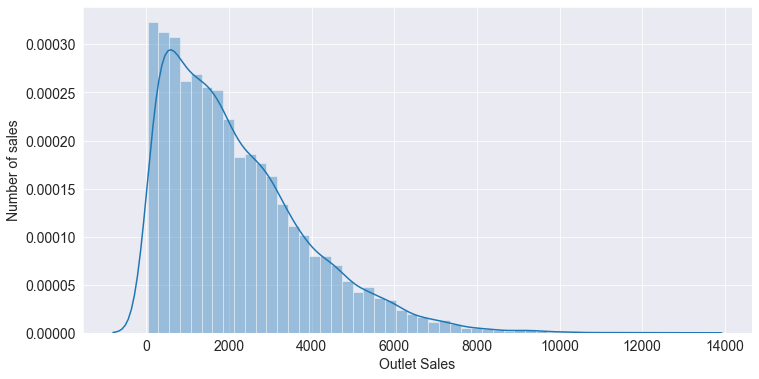

In [10]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x=train.Item_Outlet_Sales);
plt.style.use('fivethirtyeight');
plt.xlabel('Outlet Sales');
plt.ylabel('Number of sales');

In [11]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


*Skewness is a measure of how much a distribution leans to the left or right. Positive skew means more data on left, tail extends towards right. Negative skew means more data to the right, longer tail on left side.*
*Kurtosis defines how heavily the tails of a distribution differ from the tails of a normal distribution. Positive kurtosis means more data in the tails than the normal distribution. If a dataset has a negative kurtosis, it has less in the tails than the normal distribution.*

# Correlation

In [12]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


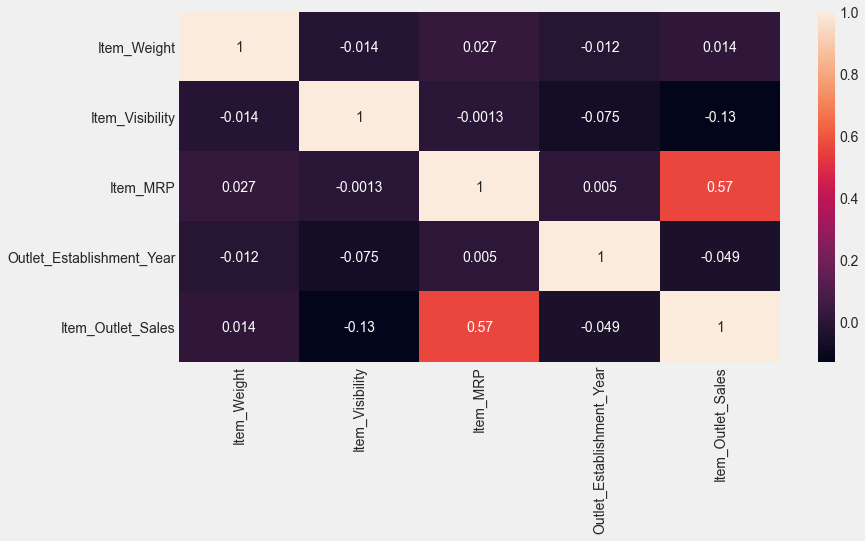

In [13]:
sns.heatmap(train.corr(),annot=True);

<font color='green'>*Item visibility has negative correlation with outlet sales. This means that that more visible products have lower sales.* 

## Scatterplot of Outlet Sales v/s Item Visibility

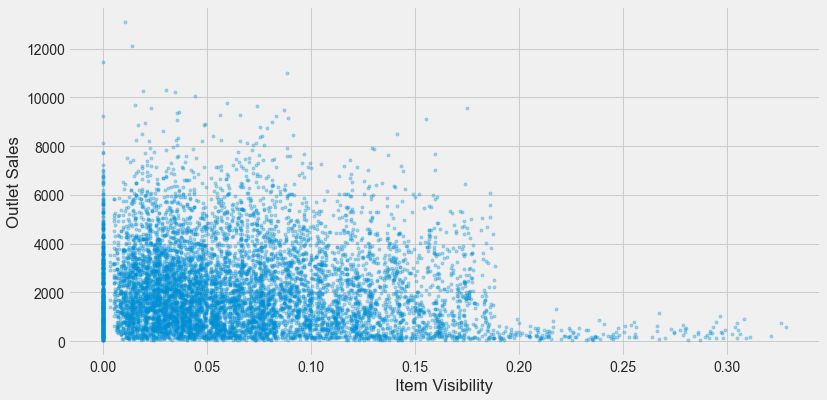

In [14]:
plt.plot(train.Item_Visibility,train.Item_Outlet_Sales,'.',alpha=0.3);
plt.xlabel('Item Visibility');
plt.ylabel('Outlet Sales');

<font color='green'>*This indicates that the more visible products recorded lower sales.*

# Median visibility of different item types

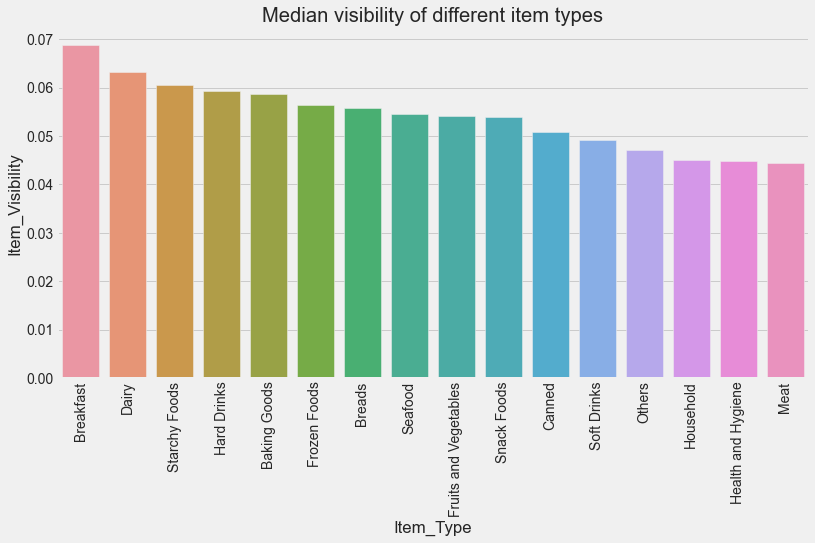

In [15]:
visandtype=train.pivot_table(index='Item_Type',values='Item_Visibility',aggfunc=np.median);
plot_order = visandtype.sort_values('Item_Visibility',ascending=False).index.values

sns.barplot(x=visandtype.index,y=visandtype.Item_Visibility, order=plot_order);
plt.xticks(rotation=90);
plt.title('Median visibility of different item types');

# Number of items sold by fat content

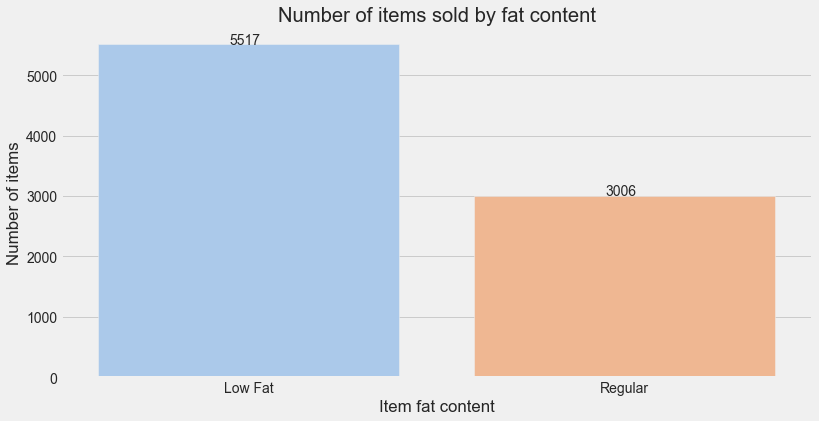

In [16]:
dfb=train.copy()
dfb.Item_Fat_Content.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True);
ax=sns.countplot(x=dfb.Item_Fat_Content,palette='pastel');
plt.title('Number of items sold by fat content');
plt.ylabel('Number of items');
plt.xlabel('Item fat content');
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

# Total sales by item fat content

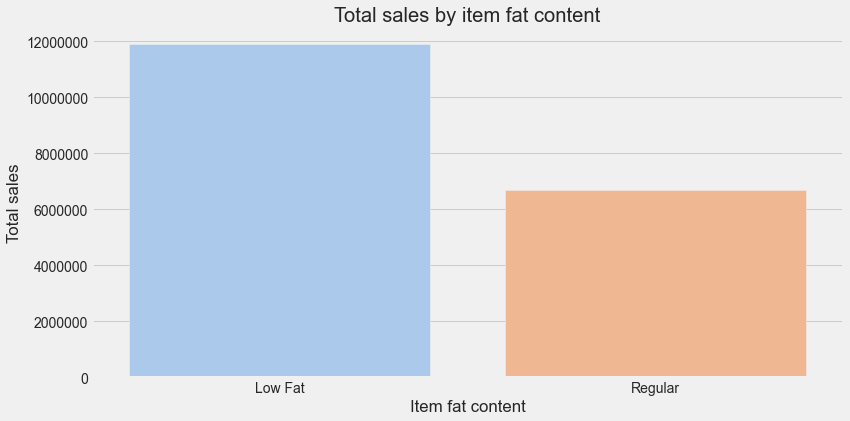

In [17]:
dfb=train.copy()
dfb.Item_Fat_Content.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True);
ax=sns.barplot(x=dfb.Item_Fat_Content,y=dfb.Item_Outlet_Sales,ci=None,estimator=sum,palette='pastel');
plt.title('Total sales by item fat content');
plt.ylabel('Total sales');
plt.xlabel('Item fat content');
plt.ticklabel_format(style='plain', axis='y')

<font color = 'green'> We observe that low fat content items reported higher sales, indicating that consumers are perhaps becoming more conscious about their health. 

# Total Sales by Item Type

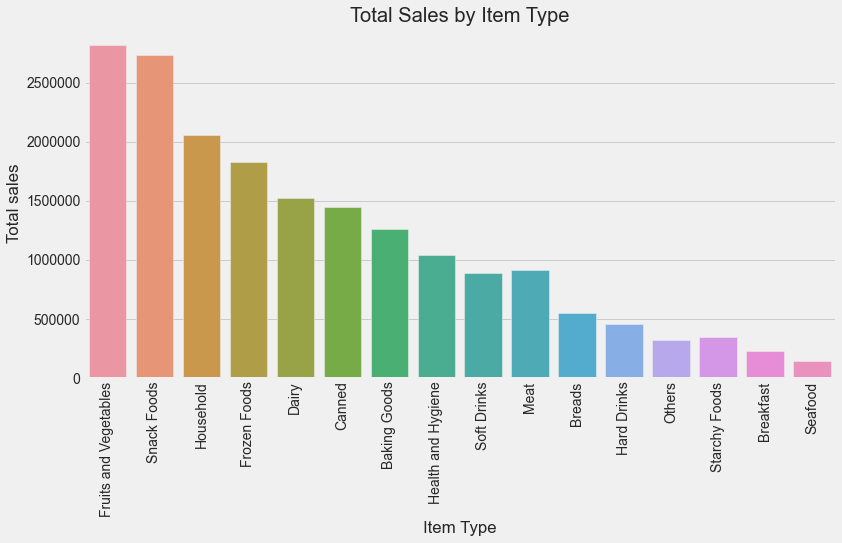

In [18]:
plot_order=train.groupby('Item_Type')['Item_Type'].count().sort_values(ascending=False).index.values
ax=sns.barplot(x=train.Item_Type,y=train.Item_Outlet_Sales,ci=None, estimator=sum,order=plot_order);
ax.set(xlabel='Item Type',ylabel='Total sales');
plt.xticks(rotation=90);
plt.title('Total Sales by Item Type');
plt.ticklabel_format(style='plain', axis='y')

<font color= 'green'> The graph indicates that fruits, vegetables and snacks are the most popular, followed by household goods.

<font color = 'green'> There are mainly three types of items: Food, Drinks, and Non-Consumables. We can use the Item Identifier column to obtain a new column named Item Type Combined.<br><br>In Item Identifier, FD corresponds to food, DR corresponds to drink, and NC corresponds to non-consumables. So we can combine these different item types

In [19]:
dfa=pd.DataFrame(columns=[['Item_Type_Combined','Item_Outlet_Sales']])

In [20]:
dfa=pd.DataFrame(columns=['Item_Type_Combined'])
dfa['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
dfa['Item_Outlet_Sales']=train['Item_Outlet_Sales']
dfa

,Item_Type_Combined,Item_Outlet_Sales
0,FD,3735.1380
1,DR,443.4228
2,FD,2097.2700
3,FD,732.3800
4,NC,994.7052
...,...,...
8518,FD,2778.3834
8519,FD,549.2850
8520,NC,1193.1136
8521,FD,1845.5976


# Total Sales by Item Type

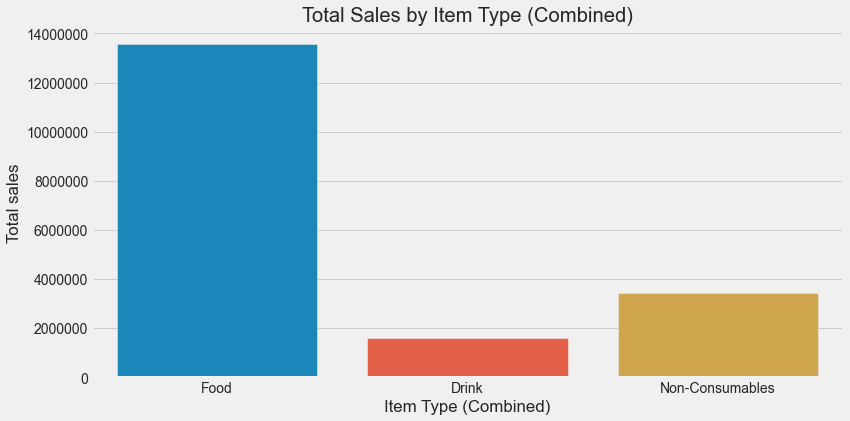

In [21]:
ax=sns.barplot(x=dfa.Item_Type_Combined,y=dfa.Item_Outlet_Sales,ci=None, estimator=sum);
ax.set(xlabel='Item Type (Combined)',ylabel='Total sales');
#plt.xticks(rotation=90);
plt.title('Total Sales by Item Type (Combined)');
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(['Food','Drink','Non-Consumables']);

<font color = 'green'> Food items reported highest sales

# Average sales by location type

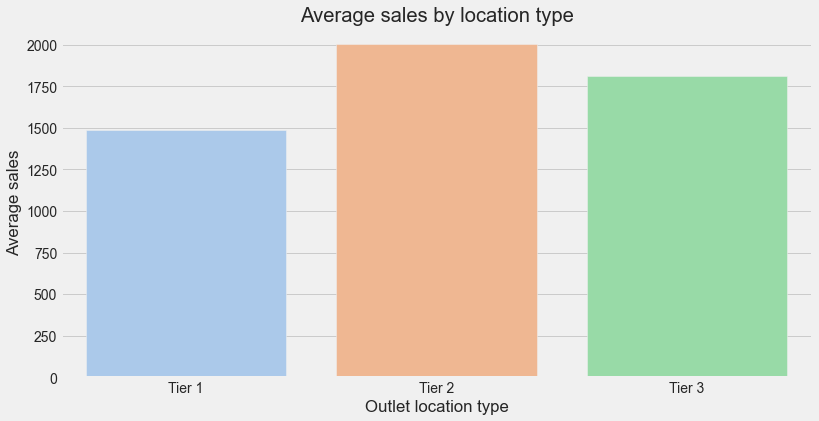

In [22]:
loctypeandsales=train.pivot_table(index='Outlet_Location_Type',values='Item_Outlet_Sales',aggfunc=np.median)
ax=sns.barplot(x=loctypeandsales.index,y=loctypeandsales.Item_Outlet_Sales,palette='pastel');
plt.title('Average sales by location type');
plt.ylabel('Average sales');
plt.xlabel('Outlet location type');

<font color='green'>*It is interesting to note that tier 2 cities had the best sales followed by tier 3 cities, while tier 1 cities had the worst sales.*

# Relationship between Outlet Sales and Item Weight

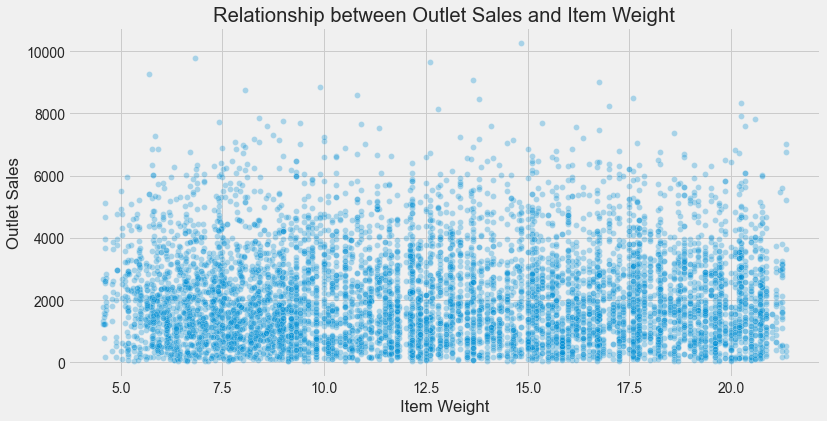

In [23]:
sns.scatterplot(x=train.Item_Weight,y=train.Item_Outlet_Sales,alpha=0.3);
plt.title('Relationship between Outlet Sales and Item Weight')
plt.xlabel('Item Weight');
plt.ylabel('Outlet Sales');

<font color = 'green'>alpha helps in adjusting transparency. Making it less than one makes the points more transparent.

# Relationship between Outlet Sales and Item MRP

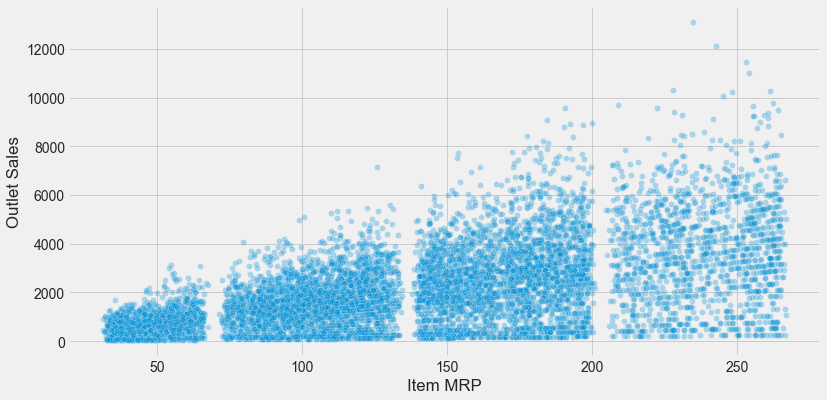

In [24]:
sns.scatterplot(x=train.Item_MRP,y=train.Item_Outlet_Sales,alpha=0.3);
plt.xlabel('Item MRP');
plt.ylabel('Outlet Sales');

# Total sales by outlet establishment year

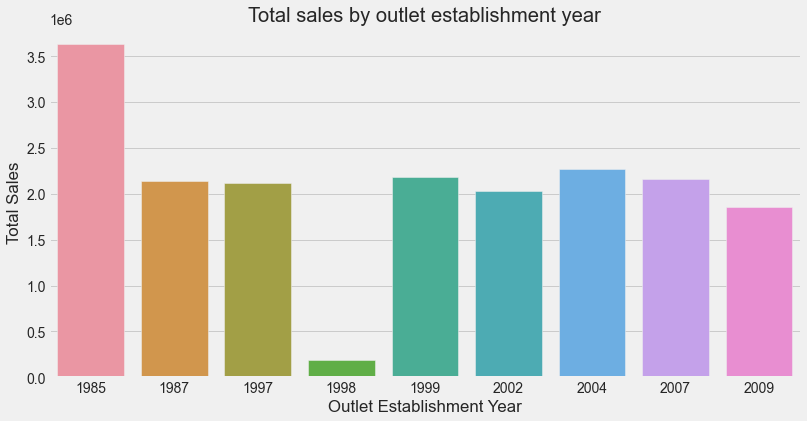

In [25]:
ax=sns.barplot(x=train.Outlet_Establishment_Year,y=train.Item_Outlet_Sales,ci=None, estimator=sum);
plt.title('Total sales by outlet establishment year');
plt.xlabel('Outlet Establishment Year');
plt.ylabel('Total Sales');

# Sales by Outlet Type

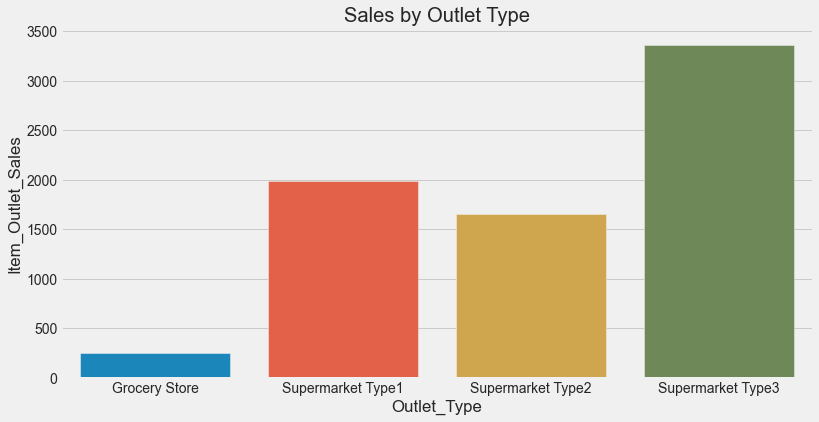

In [26]:
suptypeandsales=train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)
sns.barplot(x=suptypeandsales.index,y=suptypeandsales.Item_Outlet_Sales);
plt.title('Sales by Outlet Type');

<font color = 'green'>It seems like the Type 3 supermarket was doing better than the others.

# Sales by different outlets

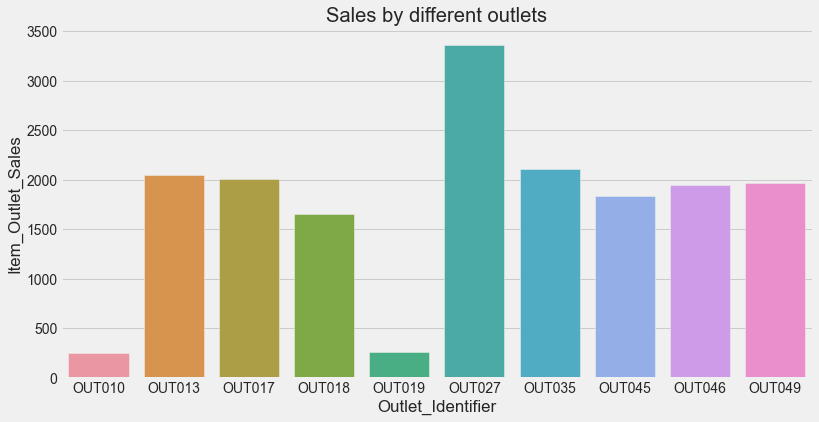

In [27]:
outidandsales=train.pivot_table(index='Outlet_Identifier',values='Item_Outlet_Sales',aggfunc=np.median)
sns.barplot(x=outidandsales.index,y=outidandsales.Item_Outlet_Sales);
plt.title('Sales by different outlets');

In [28]:
print('Number of Outlet Identifiers: ',train.Outlet_Identifier.nunique())
print('Number of Outlet Types: ',train.Outlet_Type.nunique())

Number of Outlet Identifiers:  10
Number of Outlet Types:  4


**There are 10 stores of four types**

In [29]:
train[['Outlet_Identifier','Outlet_Type']].sample(10)

,Outlet_Identifier,Outlet_Type
4055,OUT027,Supermarket Type3
7328,OUT046,Supermarket Type1
799,OUT017,Supermarket Type1
5616,OUT049,Supermarket Type1
2457,OUT046,Supermarket Type1
4295,OUT027,Supermarket Type3
3323,OUT027,Supermarket Type3
5103,OUT027,Supermarket Type3
4540,OUT027,Supermarket Type3
3841,OUT013,Supermarket Type1


## Next, we will identify number of outlets per outlet types

In [30]:
train[train.Outlet_Type=='Supermarket Type1'].Outlet_Identifier.value_counts()

OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT017    926
Name: Outlet_Identifier, dtype: int64

In [31]:
#Supermarket Type 1 Outlets
st1out = list(train[train.Outlet_Type=='Supermarket Type1'].Outlet_Identifier.value_counts().index)
st1out

['OUT013', 'OUT035', 'OUT049', 'OUT046', 'OUT045', 'OUT017']

In [32]:
#Supermarket Type 2 Outlets

train[train.Outlet_Type=='Supermarket Type2'].Outlet_Identifier.value_counts()

OUT018    928
Name: Outlet_Identifier, dtype: int64

In [33]:
#Supermarket Type 3 Outlets

train[train.Outlet_Type=='Supermarket Type3'].Outlet_Identifier.value_counts()

OUT027    935
Name: Outlet_Identifier, dtype: int64

In [34]:
#Grocery Stores
grocout=list(train[train.Outlet_Type=='Grocery Store'].Outlet_Identifier.value_counts().index)
grocout

['OUT010', 'OUT019']

## There are 2 outlets of grocery stores, 6 of Supermarket Type1, and 1 each of Supermarket Type2 and Supermarket Type3. We will classify the outlets accordingly.

In [35]:
outidandsales['Store_Type']=0

In [36]:
outidandsales

,Item_Outlet_Sales,Store_Type
Outlet_Identifier,,
OUT010,250.3408,0
OUT013,2050.6640,0
OUT017,2005.0567,0
OUT018,1655.1788,0
OUT019,265.3213,0
OUT027,3364.9532,0
OUT035,2109.2544,0
OUT045,1834.9448,0
OUT046,1945.8005,0


# Add store type depending on outlet id

In [37]:
outidandsales.loc[outidandsales.index==grocout[0],'Store_Type']='Grocery 1 (Small)'

In [38]:
outidandsales.loc[outidandsales.index==grocout[1],'Store_Type']='Grocery 2 (Small)'

In [39]:
outidandsales.loc[outidandsales.index==st1out[0],'Store_Type']='Supermarket Type1 Outlet1 (High)'
outidandsales.loc[outidandsales.index==st1out[1],'Store_Type']='Supermarket Type1 Outlet2 (Medium)'
outidandsales.loc[outidandsales.index==st1out[2],'Store_Type']='Supermarket Type1 Outlet3 (Small)'
outidandsales.loc[outidandsales.index==st1out[3],'Store_Type']='Supermarket Type1 Outlet4 (High)'
outidandsales.loc[outidandsales.index==st1out[4],'Store_Type']='Supermarket Type1 Outlet5 (Small)'
outidandsales.loc[outidandsales.index==st1out[5],'Store_Type']='Supermarket Type1 Outlet6 (Medium)'

In [40]:
outidandsales.loc[outidandsales.index=='OUT018','Store_Type']='Supermarket Type2 (Medium)'
outidandsales.loc[outidandsales.index=='OUT027','Store_Type']='Supermarket Type3 (Medium)'

In [41]:
outidandsales=pd.merge(outidandsales,train[['Outlet_Identifier','Outlet_Size']],on='Outlet_Identifier')

In [42]:
for index,row in outidandsales.iterrows():
    if row['Outlet_Identifier'] in grocout:
        outidandsales.at[index,'Outlet_Size'] = 'Small'

In [43]:
outidandsales

,Outlet_Identifier,Item_Outlet_Sales,Store_Type,Outlet_Size
0,OUT010,250.3408,Grocery 1 (Small),Small
1,OUT010,250.3408,Grocery 1 (Small),Small
2,OUT010,250.3408,Grocery 1 (Small),Small
3,OUT010,250.3408,Grocery 1 (Small),Small
4,OUT010,250.3408,Grocery 1 (Small),Small
...,...,...,...,...
8518,OUT049,1966.1074,Supermarket Type1 Outlet3 (Small),Medium
8519,OUT049,1966.1074,Supermarket Type1 Outlet3 (Small),Medium
8520,OUT049,1966.1074,Supermarket Type1 Outlet3 (Small),Medium
8521,OUT049,1966.1074,Supermarket Type1 Outlet3 (Small),Medium


<font color = 'green'> *In the data set, there are 10 stores of 4 types:<br>Grocery store, Supermarket Type 1, Supermarket Type 2, and Supermarket Type 3*

# Average sales by store type

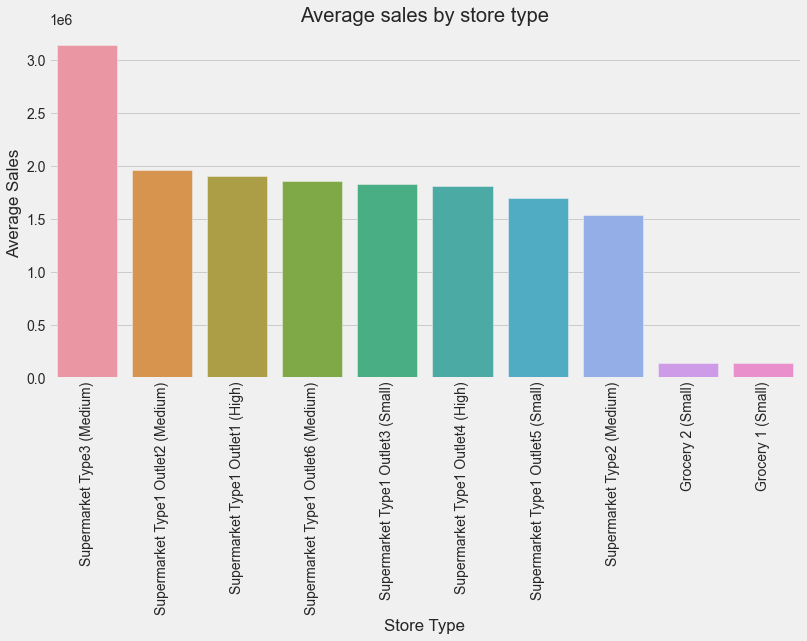

In [44]:
plot_order=outidandsales.groupby('Store_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).index.values

sns.barplot(x=outidandsales.Store_Type,y=outidandsales.Item_Outlet_Sales,estimator=sum,order=plot_order);
plt.xticks(rotation=90);
plt.title('Average sales by store type');
plt.xlabel('Store Type');
plt.ylabel('Average Sales');

<font color='green'>*The grocery stores recorded lowest sales as expected.<br>However, the surprising fact is that the best sales were from Supermarket Type 3 which is a medium sized store in a tier 3 location.*

# Average sales by store size

In [45]:
outletsizeandsales2=train.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.mean)
outletsizeandsales2['Size']={'Large','Medium','Small'}
outletsizeandsales2

,Item_Outlet_Sales,Size
Outlet_Size,,
High,2298.995256,Medium
Medium,2681.603542,Small
Small,1912.149161,Large


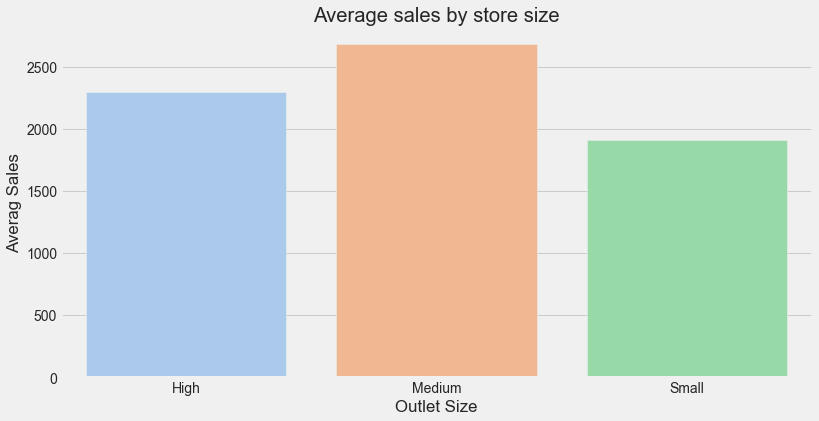

In [46]:
outletsizeandsales=train.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.mean)
sns.barplot(x=outletsizeandsales.index,y=outletsizeandsales.Item_Outlet_Sales,palette='pastel');
plt.title('Average sales by store size');
plt.ylabel('Averag Sales');
plt.xlabel('Outlet Size');

<font color='green'>*Contrary to expectations, the sales of medium size stores are better than those of the larger stores.*

# Data Preprocessing

## Since we will have missing values in both train and test, it is better to combine them into a single df 'data'. In order to separate easily later, we add one new column named 'source' which will help us differentiate between the data

In [47]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [48]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)

In [49]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [50]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<font color = 'green'>The null values in Item_Outlet_Sales is due to the test df (since it is target variable) so we will not modify that column. We have to impute nulls for item wt and outlet size.

In [51]:
data[['Item_Weight']].describe()

,Item_Weight
count,11765.000000
mean,12.792854
std,4.652502
min,4.555000
25%,8.710000
50%,12.600000
75%,16.750000
max,21.350000


In [52]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

### *We will fill item weight nulls using mean and random sampling, and use mode outlet size.*

In [53]:
iwmean=data.Item_Weight.mean()

In [54]:
data['Item_Weight_Mean']=data.Item_Weight.fillna(iwmean)

In [55]:
data['Item_Weight_Random']=data.Item_Weight
random_sample=data.Item_Weight.dropna().sample(data.Item_Weight.isnull().sum(),random_state=0)

In [56]:
random_sample

488      10.895
4895     17.750
12628    13.100
8208     10.000
6734     15.850
          ...  
4687     20.250
3028     10.695
10272     7.970
4906     20.600
5143     15.700
Name: Item_Weight, Length: 2439, dtype: float64

In [57]:
#Changing index of random sample so that it corresponds to null values instead of non-null.
random_sample.index=data[data.Item_Weight.isnull()].index

In [58]:
data.loc[data.Item_Weight.isnull(),'Item_Weight_Random']=random_sample

In [59]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Weight_Mean,Item_Weight_Random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,8.93,8.93


<font color = 'green'>A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset.

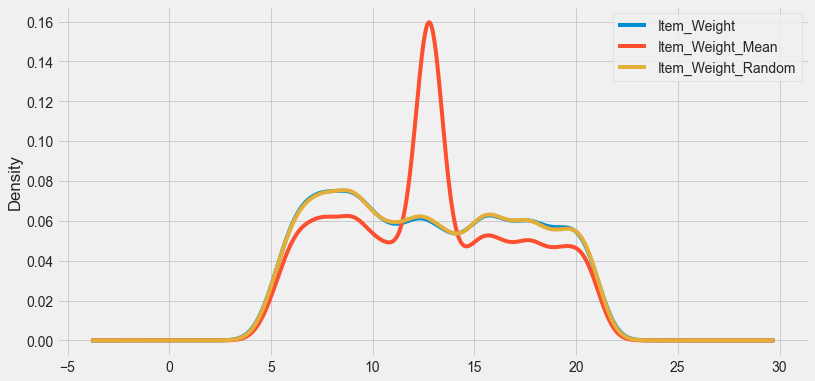

In [60]:
fig,ax=plt.subplots(1,1);
data.Item_Weight.plot(kind='kde',ax=ax);
data.Item_Weight_Mean.plot(kind='kde',ax=ax);
data.Item_Weight_Random.plot(kind='kde',ax=ax);
ax.legend();

### *The distribution for Item_Weight_Random is better than that of Item_Weight_Mean<br>So now drop other two columns*

In [61]:
data=data.drop(columns=['Item_Weight','Item_Weight_Mean'])

In [62]:
#rename column
data.rename(columns={'Item_Weight_Random':'Item_Weight'},inplace= True)

In [63]:
data.Item_Weight.isnull().sum()

0

In [64]:
#Fill Outlet Size using mode
outsizemode=data.Outlet_Size.mode()[0]
data.Outlet_Size.fillna(outsizemode,inplace=True)

In [65]:
data.Outlet_Size.isnull().sum()

0

### In visibility column, some items have 0 visibility. This is not possible since each item must be visible to the customers. So considering these values as null, we will replace them.

In [66]:
data.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [67]:
data.loc[data.Item_Visibility==0,'Item_Visibility']=data.Item_Visibility.mean()

In [68]:
data.Item_Visibility.describe()

count    14204.000000
mean         0.070034
std          0.048602
min          0.003575
25%          0.033143
50%          0.062347
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

### The establishment years do not make much sense on their own. This data is from 2013. So to get a sense of age of store, we create a new column.

In [69]:
data['Outlet_Age']=2013-data['Outlet_Establishment_Year']

In [70]:
data[['Outlet_Age']]

,Outlet_Age
0,14
1,4
2,14
3,15
4,26
...,...
14199,16
14200,4
14201,11
14202,6


In [71]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Weight,Outlet_Age
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,9.30,14
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,5.92,4
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,17.50,14
3,FDX07,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,19.20,15
4,NCD19,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,8.93,26


In [72]:
data.Item_Identifier

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

<font color='green'> We will create Item_Type_Combined column using item identifiers

In [73]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [74]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Weight,Outlet_Age,Item_Type_Combined
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,9.30,14,FD
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,5.92,4,DR
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,17.50,14,FD
3,FDX07,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,19.20,15,FD
4,NCD19,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,8.93,26,NC


In [75]:
data.Item_Type_Combined.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [76]:
data.Item_Type_Combined.replace({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'},inplace=True);

In [77]:
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [78]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

<font color = 'green'>Low fat is written in 3 ways while regular is written in 2.<br>Replace lf, low fat and reg*

In [79]:
data.Item_Fat_Content.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True);

In [80]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

#### The data contains fat content values for non consumables which is not possible.

In [81]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

In [82]:
data.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Feature Transformation

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  source                     14204 non-null  object 
 12  Item_Weight                14204 non-null  float64
 13  Outlet_Age                 14204 non-null  int

In [84]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Weight,Outlet_Age,Item_Type_Combined
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,9.30,14,Food
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,5.92,4,Drinks
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,17.50,14,Food
3,FDX07,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,19.20,15,Food
4,NCD19,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,8.93,26,Non-Consumable


<font color = 'green'> Drop unnecessary columns

In [85]:
data=data.drop(columns=['Item_Identifier','Outlet_Establishment_Year','Item_Type'])

In [86]:
data.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Weight,Outlet_Age,Item_Type_Combined
0,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,9.30,14,Food
1,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,5.92,4,Drinks
2,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,17.50,14,Food
3,Regular,0.065953,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,train,19.20,15,Food
4,Non-Edible,0.065953,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,8.93,26,Non-Consumable


<font color = 'green'>We need to convert item fat content, item type, outlet identifier, outlet size, location type, outlet type, item type combined to numerical values.

# Label Encoding

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [88]:
def featuretrans(df,variable):
    print(variable)
    print(df[variable].unique())
    print()
    label=le.fit_transform(df[variable])
    del df[variable]
    df[variable]=label
    print(df[variable].unique())
    print()

In [89]:
var_mod=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined']

In [90]:
for var in var_mod:
    featuretrans(data,var)

Item_Fat_Content
['Low Fat' 'Regular' 'Non-Edible']

[0 2 1]

Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

[9 3 0 1 5 7 2 8 6 4]

Outlet_Size
['Medium' 'High' 'Small']

[1 0 2]

Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']

[0 2 1]

Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']

[1 2 0 3]

Item_Type_Combined
['Food' 'Drinks' 'Non-Consumable']

[1 0 2]



In [91]:
data.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Item_Weight,Outlet_Age,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,0.016047,249.8092,3735.1380,train,9.30,14,0,9,1,0,1,1
1,0.019278,48.2692,443.4228,train,5.92,4,2,3,1,2,2,0
2,0.016760,141.6180,2097.2700,train,17.50,14,0,9,1,0,1,1
3,0.065953,182.0950,732.3800,train,19.20,15,2,0,1,2,0,1
4,0.065953,53.8614,994.7052,train,8.93,26,1,1,0,2,1,2


### Splitting and Exporting data

In [92]:
train=data.loc[data.source=='train']
test=data.loc[data.source=='test']

In [93]:
test.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Item_Weight,Outlet_Age,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
8523,0.007565,107.8622,NaN,test,20.750,14,0,9,1,0,1,1
8524,0.038428,87.3198,NaN,test,8.300,6,2,2,1,1,1,1
8525,0.099575,241.7538,NaN,test,14.600,15,1,0,1,2,0,2
8526,0.015388,155.0340,NaN,test,7.315,6,0,2,1,1,1,1
8527,0.118599,234.2300,NaN,test,19.600,28,2,5,1,2,3,1


### Remove unnecessary columns from train and test

In [94]:
train=train.drop(columns=['source'])
test=test.drop(columns=['source'])

In [95]:
train.to_csv('datasets/trainmodsteve',index=False)
test.to_csv('datasets/testmodsteve',index=False)

In [96]:
train_df = pd.read_csv('datasets/trainmodsteve')
test_df = pd.read_csv('datasets/testmodsteve')

In [97]:
target='Item_Outlet_Sales'

After creating the predictive models, we need to validate the models. For this purpose, I calculated the root mean square error(RMSE) and cross validation of the models.
The RMSE value provides an indication regarding the dispersion or the variability of the prediction accuracy.
Why cross validation?
While designing a predictive model, we initially train the sample with one dataset. However, to ensure that the quality of the model is well estimated, the model must be trained with different sets of training datasets, and cross-validation allows us to check whether the validation is similar for different datasets.

In [98]:
test_df

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Weight,Outlet_Age,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,0.007565,107.8622,NaN,20.750,14,0,9,1,0,1,1
1,0.038428,87.3198,NaN,8.300,6,2,2,1,1,1,1
2,0.099575,241.7538,NaN,14.600,15,1,0,1,2,0,2
3,0.015388,155.0340,NaN,7.315,6,0,2,1,1,1,1
4,0.118599,234.2300,NaN,19.600,28,2,5,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,0.013496,141.3154,NaN,10.500,16,2,8,2,0,1,1
5677,0.142991,169.1448,NaN,7.600,4,2,3,1,2,2,1
5678,0.073529,118.7440,NaN,10.000,11,1,7,1,1,1,2
5679,0.065953,214.6218,NaN,15.300,6,2,2,1,1,1,1


In [99]:
X_train=train_df.drop(columns=['Item_Outlet_Sales'])
y_train=train_df['Item_Outlet_Sales']
X_test=test_df.drop(columns=['Item_Outlet_Sales'])
y_test=test_df['Item_Outlet_Sales']

In [100]:
predictors = train_df.columns.drop(['Item_Outlet_Sales'])

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def modelfit(model,X_train,y_train):
    model.fit(X_train,y_train)
    pred=model.predict(X_train)
    rmse=np.sqrt(mean_squared_error(y_train,pred))
    mae=mean_absolute_error(y_train,pred)
    r2s=r2_score(y_train,pred)
    #cv_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error')
    #cv_score=np.sqrt(np.abs(cv_score))
    y_test=model.predict(X_test)
    print('RMSE:',round(rmse,2))
    print('Mean Absolute Error:',round(mae,2))
    print('R-Squared value:',round(r2s,2))
    #print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

# Linear Regression

RMSE: 1194.04
Mean Absolute Error: 897.18
R-Squared value: 0.51


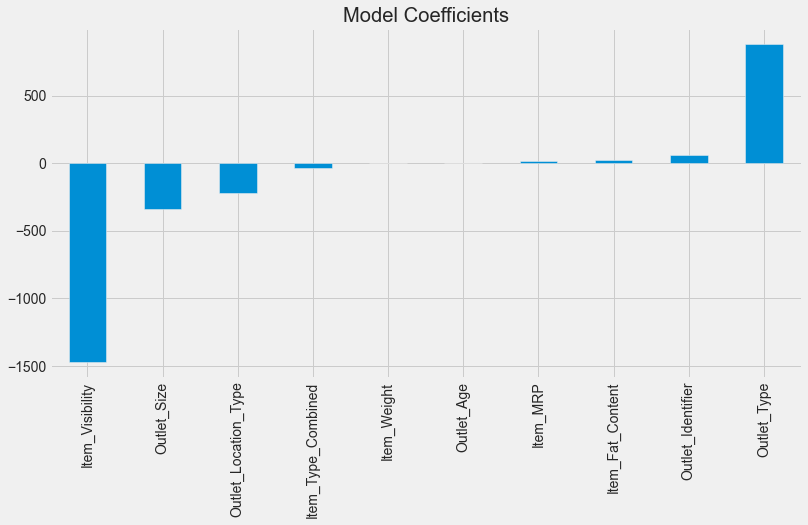

In [102]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
modelfit(LR,X_train,y_train)
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients');

The model coefficient indicates the correlation between the dependent and the independent variables.

A positive coefficient indicates that as the value of the independent variable increases, the dependent variable also tends to increase. 

A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

# Ridge Regression

RMSE: 1195.96
Mean Absolute Error: 895.99
R-Squared value: 0.51


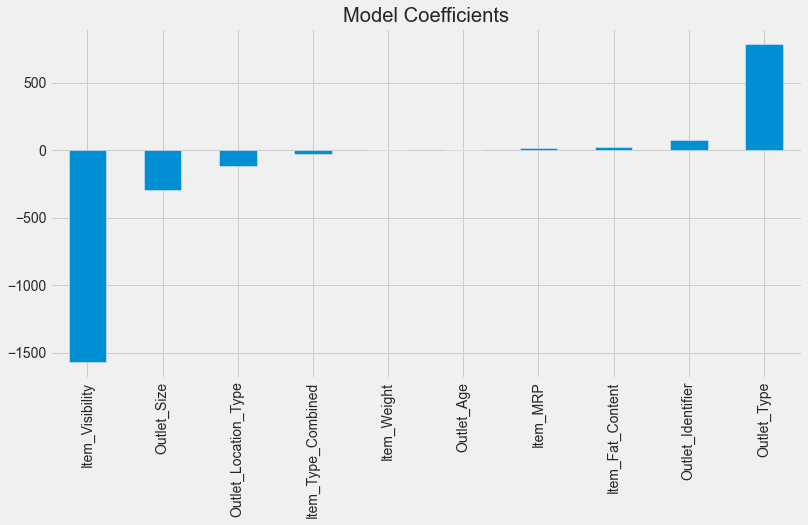

In [103]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR,X_train,y_train)

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients');

# Decision Tree Regressor

RMSE: 1059.3
Mean Absolute Error: 743.72
R-Squared value: 0.61


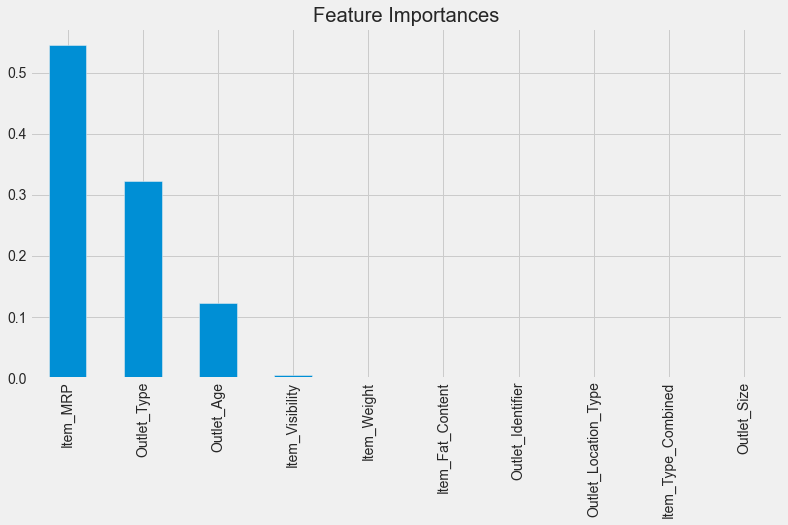

In [104]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT,X_train,y_train)

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances');

# Random Forest Regressor

RMSE: 1073.09
Mean Absolute Error: 752.73
R-Squared value: 0.6


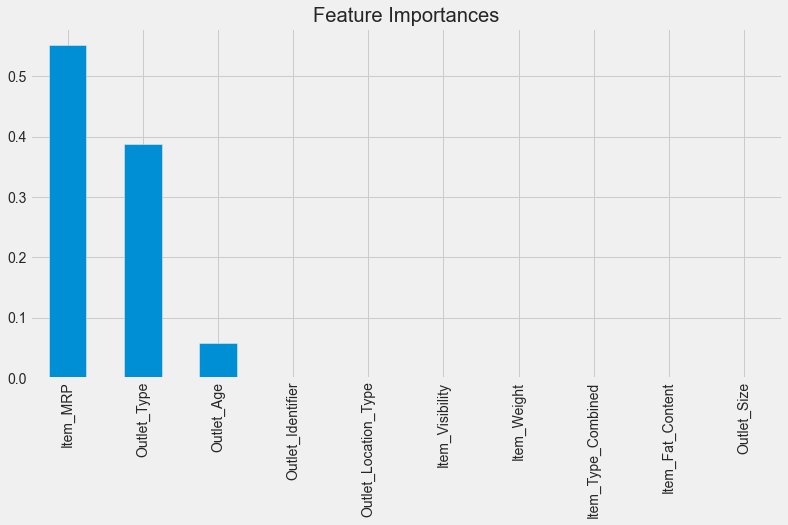

In [105]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(RF,X_train,y_train)

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances');

## The two best models are Decision Tree and Random Forest.



<font color = 'green'> First, we will predict outlets sales for a random item from the dataset

In [106]:
X_train.iloc[13]

Item_Visibility           0.047257
Item_MRP                119.678200
Item_Weight              17.600000
Outlet_Age               16.000000
Item_Fat_Content          2.000000
Outlet_Identifier         8.000000
Outlet_Size               2.000000
Outlet_Location_Type      0.000000
Outlet_Type               1.000000
Item_Type_Combined        1.000000
Name: 13, dtype: float64

In [107]:
y_train[13]

2145.2076

In [108]:
print('Decision Tree prediction:',DT.predict([X_train.iloc[13].values]))

Decision Tree prediction: [2140.51925833]


<font color = 'green'> The actual value and predicted value are fairly close

<font color = 'green'>Next, let's predict sales of two similar items to identify which will have better sales:<br><br>Product 1: Low visibility, Medium size store, Low Fat, Tier 3 location

In [109]:
inp1=[[0,2000,10,15,0,9,1,2,1,1]]

In [110]:
inp1=pd.DataFrame(inp1)
inp1.columns=['Item_Visibility','Item_MRP','Item_Weight','Outlet_Age','Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined']

In [111]:
print('Decision Tree prediction:',DT.predict(inp1))

Decision Tree prediction: [4433.30403265]


<font color = 'green'>Product 2: High visibility, Lagre store, Regular fat, Tier 1 location

In [112]:
inp2=[[1,2000,10,15,1,9,0,0,1,1]]

In [113]:
print('Decision Tree prediction:',DT.predict(inp2))

Decision Tree prediction: [4034.3003069]


In [114]:
inp2=pd.DataFrame(inp2)
inp2.columns=['Item_Visibility','Item_MRP','Item_Weight','Outlet_Age','Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined']

<font color = 'green'>The sales of product 1 are better in both cases.

# <font color = 'red'> END